### End 2 End NLP Project
+ Emotion Detection In Customer review text 
+ Text Classifier

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
#run only one time
#pip install neattext

In [4]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [6]:
# Load Dataset

df = pd.read_csv("final_data.csv")

In [7]:
df.head()

,Emotion,cleaned_text,without_sw
0,anger,fuckin m transtelecom,fuckin transtelecom
1,anger,working but it s fridaaaayyyyy,working fridaaaayyyyy
2,anger,packing i don t like it,packing like
3,anger,i tried to dye my hair and all i got was a blo...,tried dye hair got blond chunk front middle pa...
4,anger,quot locked up abroad quot makes bein half br...,quot locked abroad quot makes bein half brown ...


In [8]:
# Value Counts
df['Emotion'].value_counts()

criticism    25066
hate         14886
anger        14839
offensive    10579
joy          10200
optimism      9007
fear          8829
sadness       8520
love          6296
surprise      5106
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

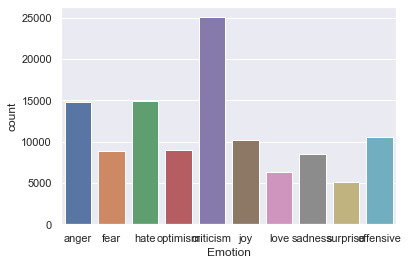

In [9]:
# Plot
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x='Emotion',data=df)

In [10]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
# Remove User handles

df['Clean_Text'] = df['cleaned_text'].apply(nfx.remove_userhandles) 

In [12]:
# Stopwords

df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [13]:
df

,Emotion,cleaned_text,without_sw,Clean_Text
0,anger,fuckin m transtelecom,fuckin transtelecom,fuckin transtelecom
1,anger,working but it s fridaaaayyyyy,working fridaaaayyyyy,working fridaaaayyyyy
2,anger,packing i don t like it,packing like,packing like
3,anger,i tried to dye my hair and all i got was a blo...,tried dye hair got blond chunk front middle pa...,tried dye hair got blond chunk middle hair dang
4,anger,quot locked up abroad quot makes bein half br...,quot locked abroad quot makes bein half brown ...,quot locked abroad quot makes bein half brown ...
...,...,...,...,...
113323,offensive,that isnt a bill about lgbt sex workers its a...,bill lgbt sex workers bill sex workers gener...,isnt bill lgbt sex workers bill sex workers ge...
113324,offensive,lol did you just do the trump very fine peopl...,lol trump fine people sides antifa punches naz...,lol trump fine people sides antifa punches naz...
113325,offensive,all i have to say is i amp facial expressions...,say amp facial expressions everything see vid...,amp facial expressions video fucking
113326,offensive,wondering what shit on our east coast causing...,wondering shit east coast causing god send flo...,wondering shit east coast causing god send flo...


In [14]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [16]:
def get_longest_text(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text.split())
        longest_input = max(longest_input, text_len)
    return longest_input

#longest_input = get_longest_text(dataset['Text']) #Xfeatures
longest_input = get_longest_text(Xfeatures)
longest_input

82

In [17]:
len(Xfeatures[1].split())

2

In [18]:
def get_total_words(texts):
    total_words = []
    for text in texts:
        for word in text.split():
            if word not in total_words:
                total_words.append(word)
#         text_len= len(text.split())
#         total_words = total_words + text_len
    return len(total_words)

word_count = get_total_words(Xfeatures)
word_count

50385

In [19]:
from keras.preprocessing.text import one_hot

In [20]:
# integer encode the documents
vocab_size = 21000
encoded_docs = [one_hot(d, vocab_size) for d in Xfeatures]
print(encoded_docs[0])

[18283, 587]


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
# pad documents to a max length of 66 words
max_length = longest_input
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs[0])

[18283   587     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0]


In [23]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
import tensorflow as tf
#tf.keras.layers.Embedding 

## LSTM

In [103]:

from tensorflow.keras import layers

int_sequences_input = tf.keras.Input(shape=(None,), dtype="int64")

embedded_sequences = Embedding(vocab_size, 132, input_length=max_length)(int_sequences_input)

x = layers.LSTM(1, return_sequences=True, )(embedded_sequences) # 10 , 50, 200, 500
x = layers.LSTM(1)(x)
#x =layers.Flatten()(x)
preds = layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(int_sequences_input, preds)
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 132)         2772000   
                                                                 
 lstm_10 (LSTM)              (None, None, 1)           536       
                                                                 
 lstm_11 (LSTM)              (None, 1)                 12        
                                                                 
 dense_5 (Dense)             (None, 10)                20        
                                                                 
Total params: 2,772,568
Trainable params: 2,772,568
Non-trainable params: 0
_________________________________________________________________


"\n# define the model\nmodel = Sequential()\nmodel.add(Embedding(vocab_size, 132, input_length=max_length))\n\nmodel.add(tf.keras.layers.LSTM (1, return_sequences=True ))\n\nmodel.add(tf.keras.layers.LSTM (1))\n\n#model.add(Flatten())\n\n#model.add(Dense(1024, activation='relu'))\n#model.add(Dropout(0.2))\n\nmodel.add(Dense(10, activation='softmax'))\n\n\n# summarize the model\nprint(model.summary())\n"

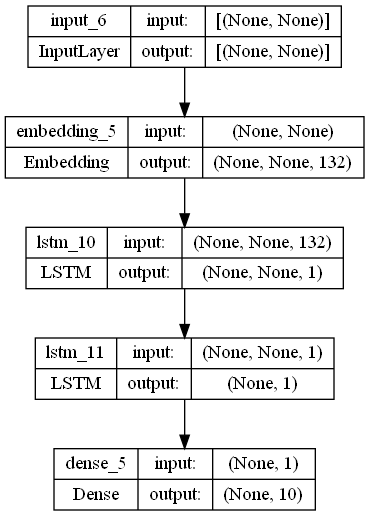

In [104]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [112]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [113]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_encoder = encoder.fit_transform(ylabels)
y = to_categorical(y_encoder)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [114]:
y=y.astype(np.int32)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.33, random_state=42)

In [116]:
X_train.shape, y_train.shape

((75929, 82), (75929, 10))

In [117]:
y_train 

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [141]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/10
1187/1187 [==============================] - 45s 37ms/step - loss: 1.6020 - accuracy: 0.4331 - val_loss: 1.3217 - val_accuracy: 0.5395
Epoch 2/10
1187/1187 [==============================] - 42s 36ms/step - loss: 1.2621 - accuracy: 0.5637 - val_loss: 1.2441 - val_accuracy: 0.5724
Epoch 3/10
1187/1187 [==============================] - 43s 36ms/step - loss: 1.1605 - accuracy: 0.6006 - val_loss: 1.2018 - val_accuracy: 0.5912
Epoch 4/10
1187/1187 [==============================] - 43s 36ms/step - loss: 1.0911 - accuracy: 0.6273 - val_loss: 1.1738 - val_accuracy: 0.6007
Epoch 5/10
1187/1187 [==============================] - 43s 36ms/step - loss: 1.0353 - accuracy: 0.6475 - val_loss: 1.1766 - val_accuracy: 0.6043
Epoch 6/10
1187/1187 [==============================] - 43s 36ms/step - loss: 0.9975 - accuracy: 0.6593 - val_loss: 1.1712 - val_accuracy: 0.6088
Epoch 7/10
1187/1187 [==============================] - 43s 36ms/step - loss: 0.9628 - accuracy: 0.6722 - val_loss: 1.1711 -

In [142]:
#Convert history to pandas dataframe
res_df = pd.DataFrame(history.history)
res_df

,loss,accuracy,val_loss,val_accuracy
0,1.601978,0.433062,1.321721,0.539480
1,1.262143,0.563711,1.244091,0.572422
2,1.160547,0.600627,1.201823,0.591192
3,1.091125,0.627310,1.173801,0.600658
4,1.035343,0.647500,1.176624,0.604348
5,0.997455,0.659300,1.171154,0.608760
6,0.962754,0.672246,1.171066,0.613091
7,0.939339,0.678753,1.163228,0.618840
8,0.915565,0.685509,1.165701,0.618305
9,0.890074,0.695782,1.174304,0.619241


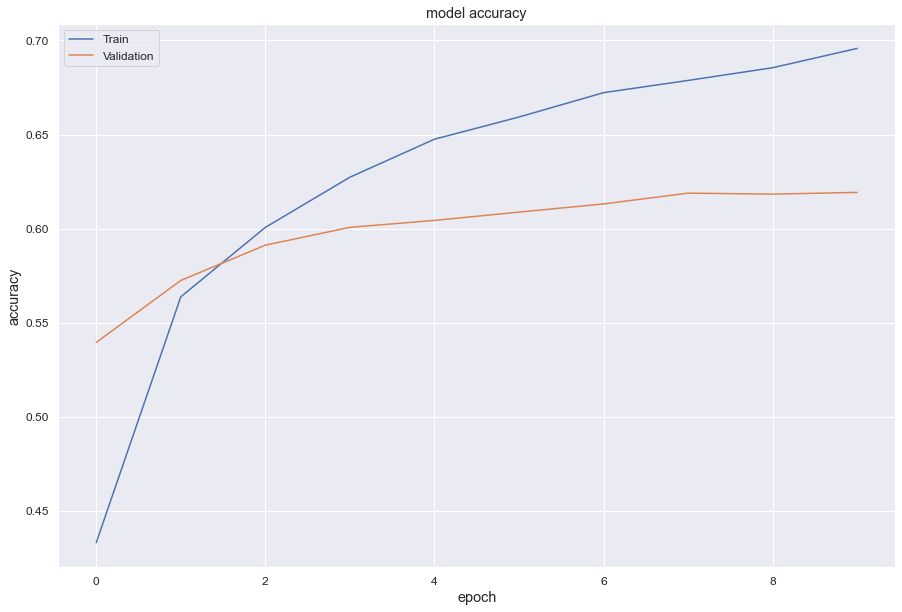

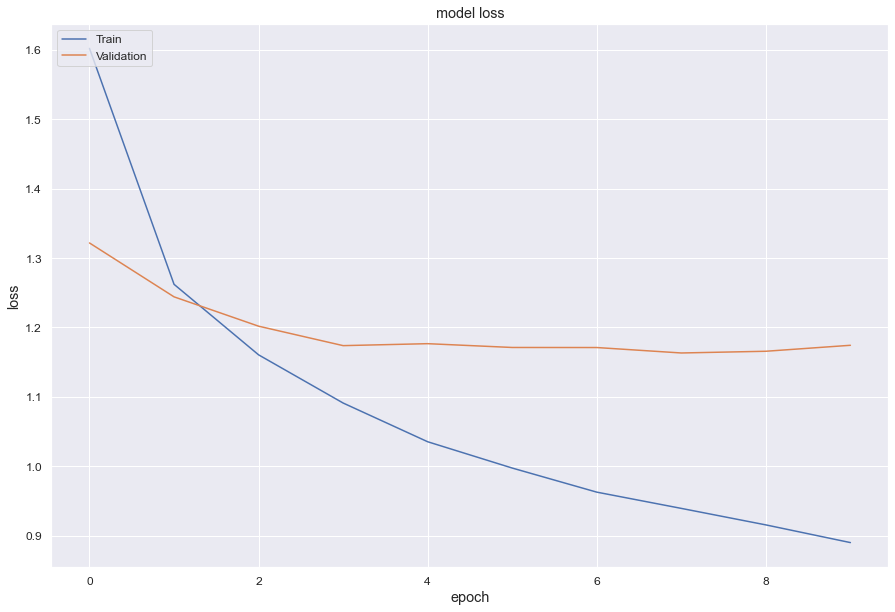

In [146]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()